# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Importing Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Importing CSV File

In [2]:
df=pd.read_csv("Company_Data.csv")

# EDA

#### Converting sales data into 3 categories Low, High, Medium by Making sales columns

In [3]:
# we need 3 values for low medium and high so making 4 bins so we get 3 regions 
bins = np.linspace(min(df['Sales']), max(df['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [4]:
label_names = ['Low', 'Medium', 'High']

In [5]:
df['Sales_bin'] = pd.cut(df['Sales'], bins, labels=label_names, include_lowest=True )
df[['Sales','Sales_bin']].head(10)

Sales Sales_bin
0   9.50    Medium
1  11.22      High
2  10.06    Medium
3   7.40    Medium
4   4.15       Low
5  10.81    Medium
6   6.63    Medium
7  11.85      High
8   6.54    Medium
9   4.69       Low

In [6]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_bin  
0         17   Yes  Yes    Medium  
1         10   Yes  Yes      High  
2         12   Yes  Yes    Medium  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [7]:
df["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
df["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
df["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
df.shape

(400, 12)

In [11]:
# to see stastetical values
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [13]:
# to see if there any null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

#### Feature Engineering

In [14]:
df=df.drop(("Sales"),axis=1) # we dont need it anymore

In [15]:
df.head()

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_bin  
0         17   Yes  Yes    Medium  
1         10   Yes  Yes      High  
2         12   Yes  Yes    Medium  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [16]:
#Creating dummy vairables for ['ShelveLoc','Urban','US'] dropping first dummy variable
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'], drop_first=True)


In [17]:
df.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

  Sales_bin  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0    Medium               0                 0          1       1  
1      High               1                 0          1       1  
2    Medium               0                 1          1       1  
3    Medium               0                 1          1       1  
4       Low               0                 0          1       0

# Visualisation

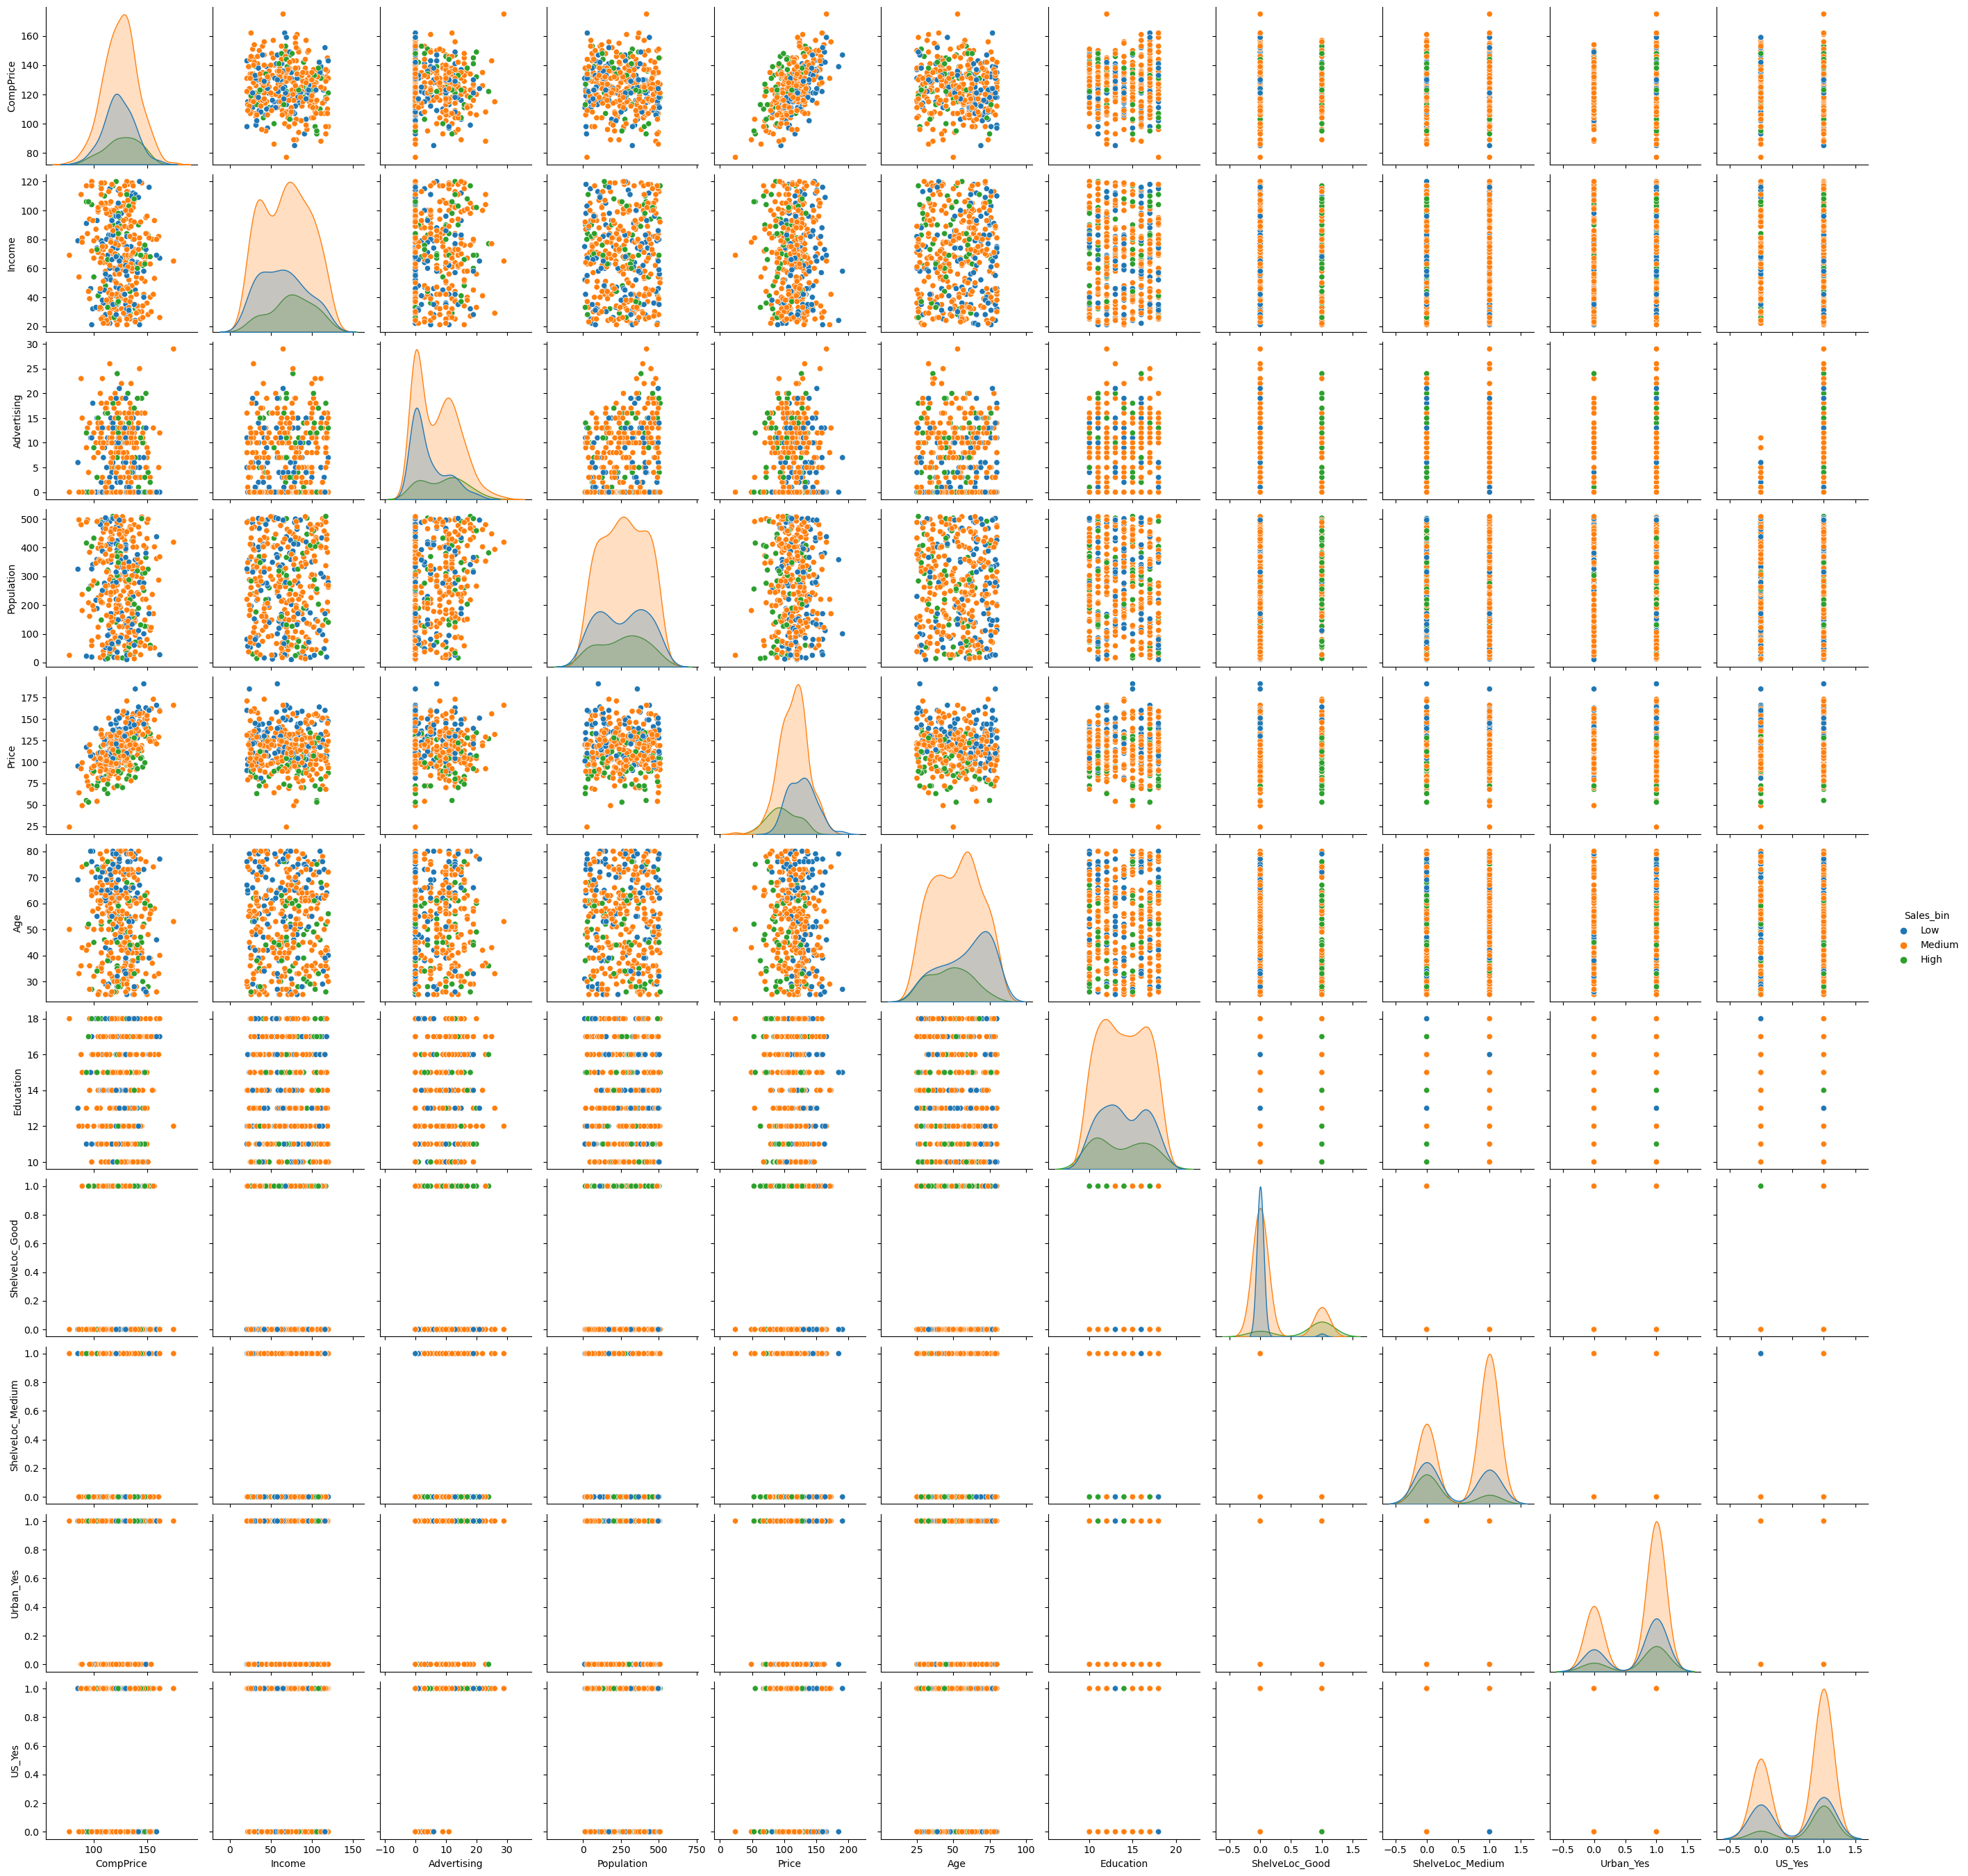

In [18]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales_bin')

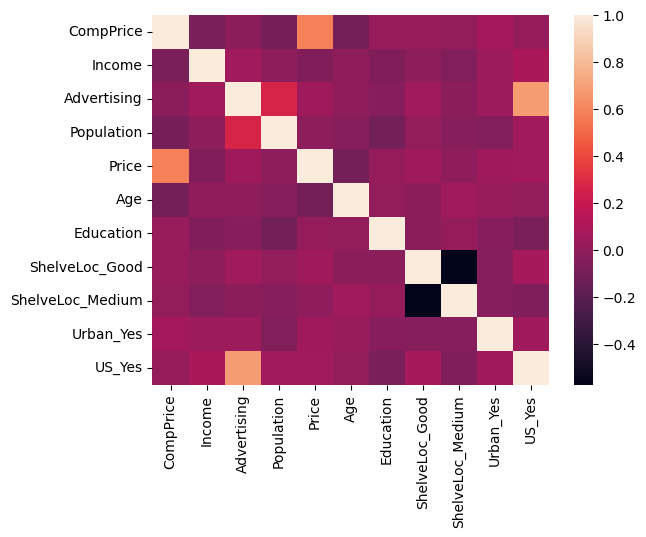

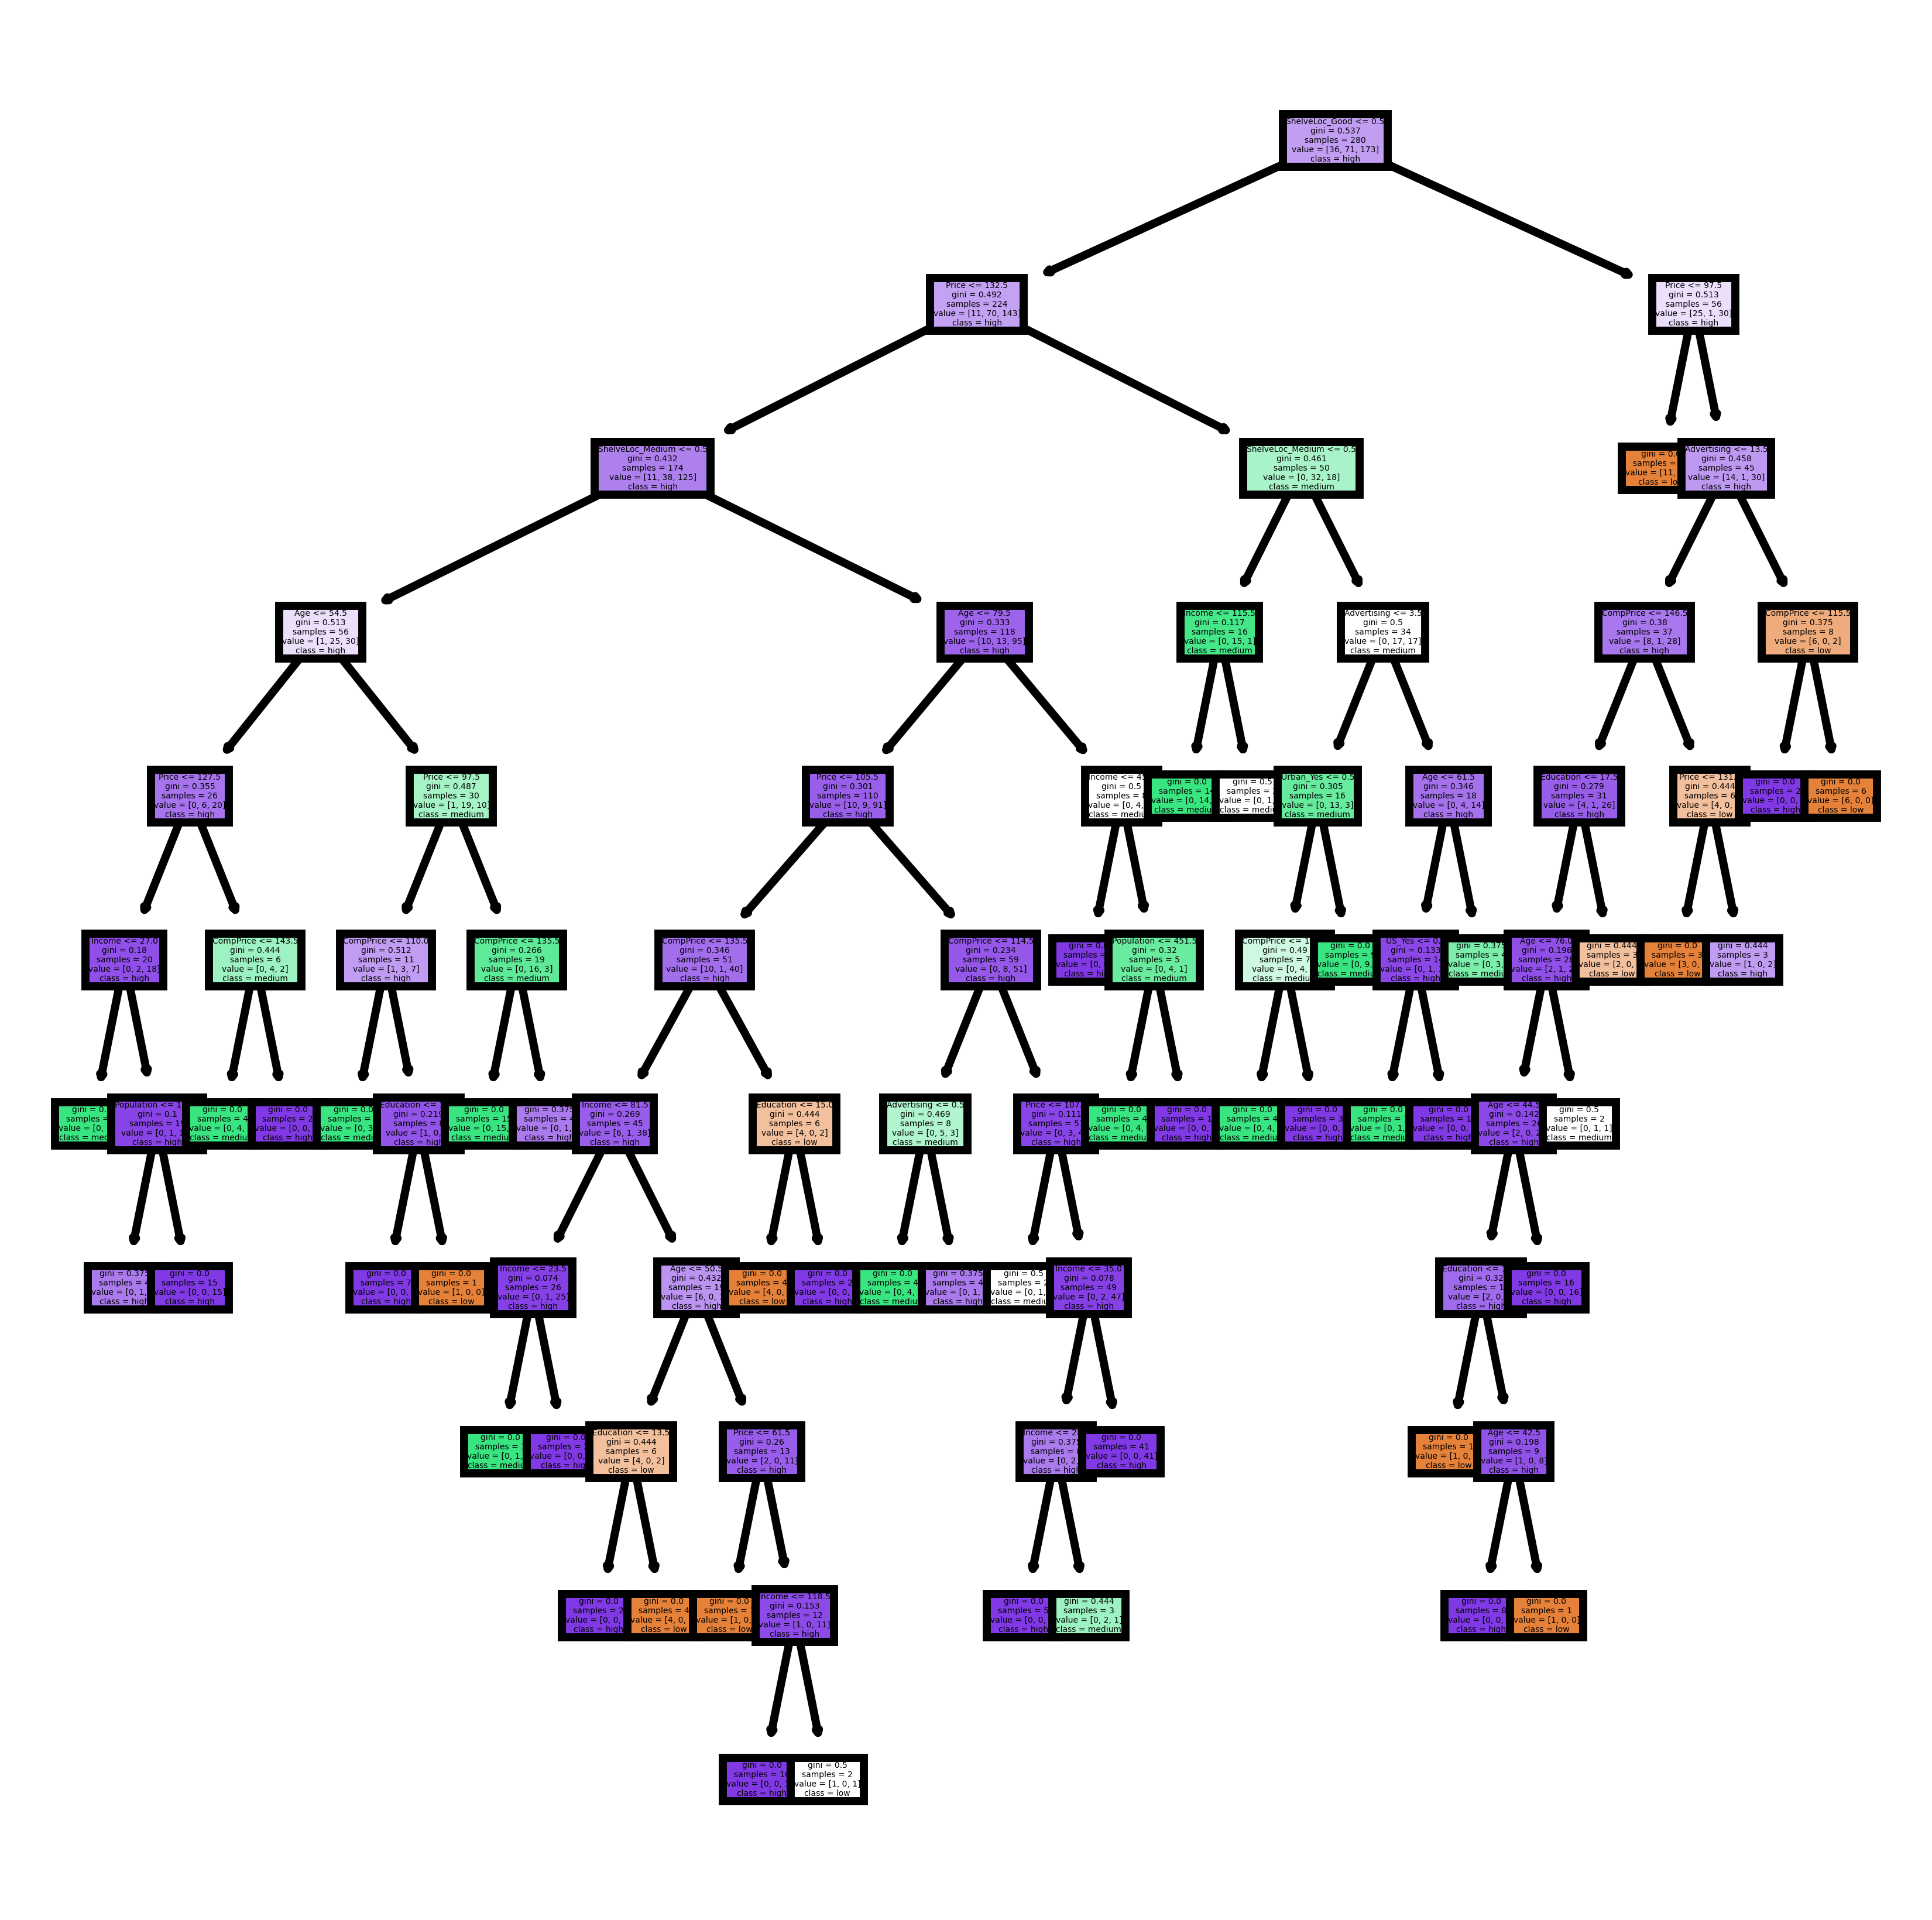

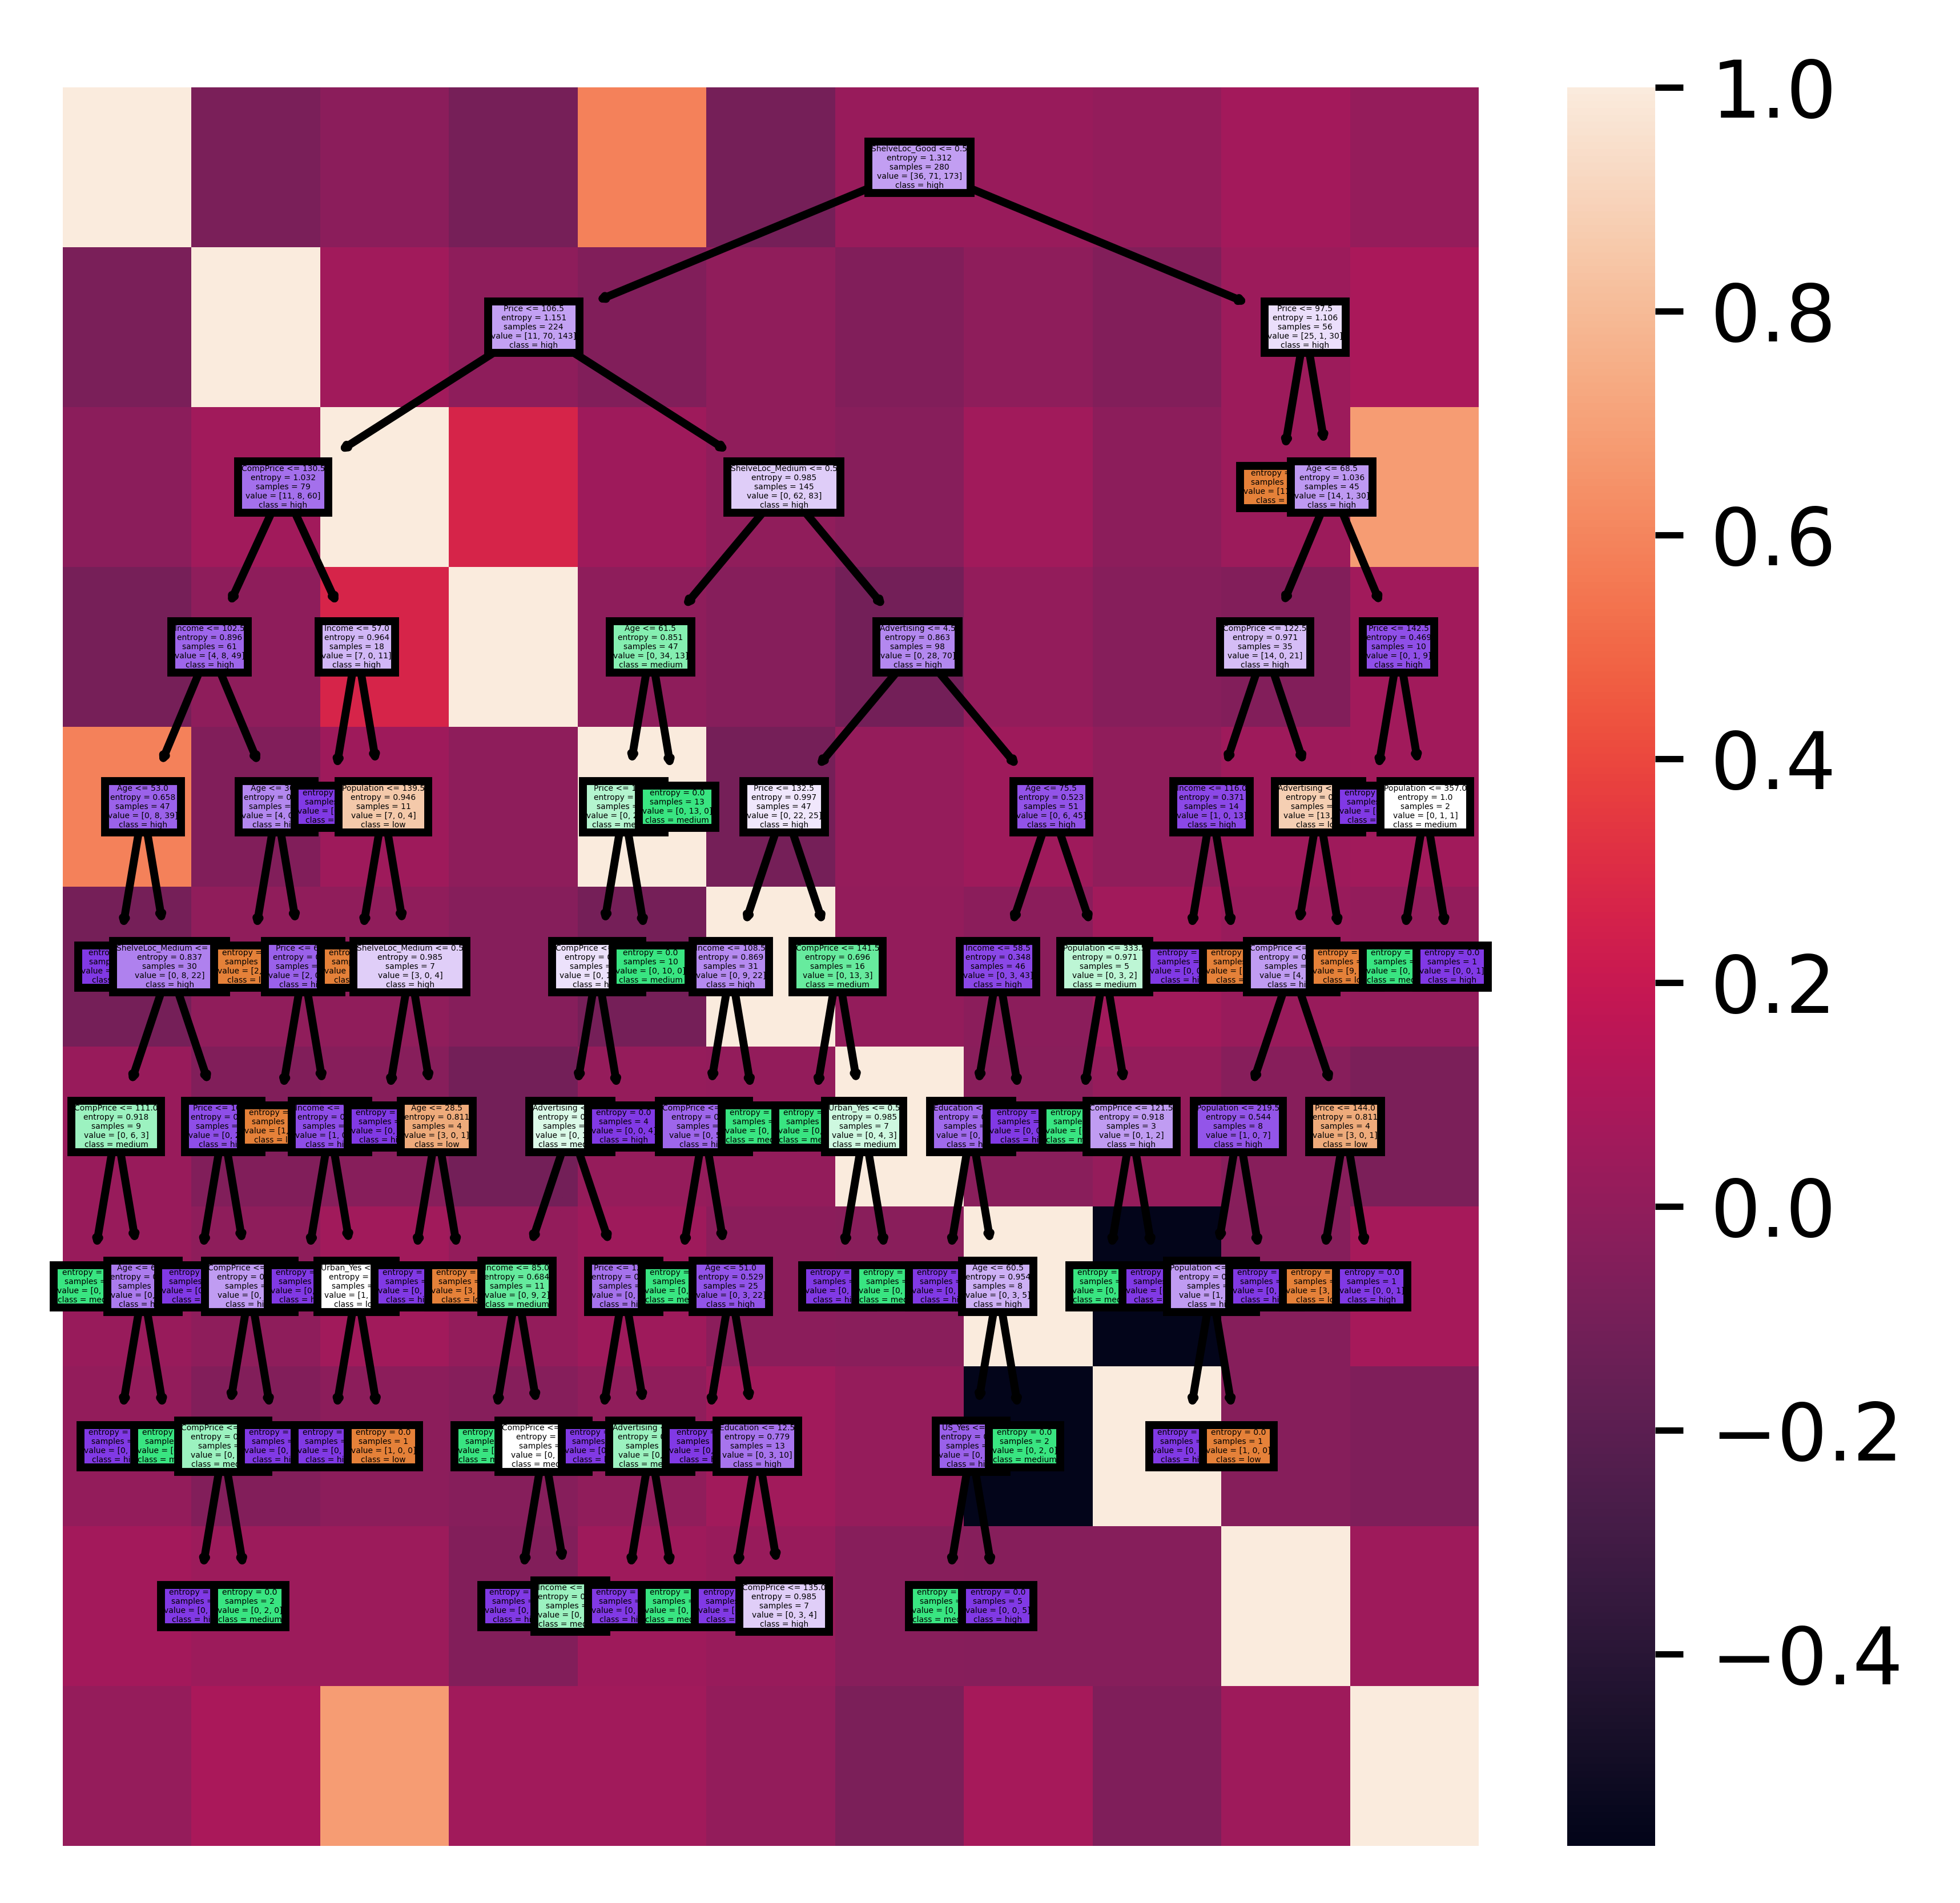

In [42]:
sns.heatmap(df.corr())
plt.show()

# Splitting into Train and Test Data

In [20]:
X=df.drop('Sales_bin',axis=1)
y=df.Sales_bin

In [21]:
X.shape

(400, 11)

In [22]:
y.shape

(400,)

In [23]:
# splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)

In [24]:
X_train.shape

(280, 11)

In [25]:
y_train.shape

(280,)

In [26]:
X_test.shape

(120, 11)

In [27]:
y_train.shape

(280,)

# Building Decision Tree Classifier 
### using "gini" Criteria

In [28]:
model1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model1.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [29]:
pred1=model1.predict(X_test)
pred1

array(['Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'High', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'Medium',
       'Low', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'Low',
     

In [30]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [31]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [32]:
accuracy_score(pred1,y_test)

0.625

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1)) 

              precision    recall  f1-score   support

        High       0.50      0.60      0.55        15
         Low       0.52      0.52      0.52        31
      Medium       0.70      0.68      0.69        74

    accuracy                           0.62       120
   macro avg       0.57      0.60      0.58       120
weighted avg       0.63      0.62      0.63       120



In [34]:
print(confusion_matrix(y_test,pred1))

[[ 9  0  6]
 [ 0 16 15]
 [ 9 15 50]]


### using "entropy" Criteria

In [35]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [36]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [37]:
pred2=model2.predict(X_test)
pred2

array(['Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Low', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium

In [38]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age','Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes','US_Yes']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [39]:
accuracy_score(pred2,y_test)

0.7333333333333333

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2)) 

              precision    recall  f1-score   support

        High       0.64      0.47      0.54        15
         Low       0.67      0.71      0.69        31
      Medium       0.78      0.80      0.79        74

    accuracy                           0.73       120
   macro avg       0.69      0.66      0.67       120
weighted avg       0.73      0.73      0.73       120



In [41]:
print(confusion_matrix(y_test,pred2))

[[ 7  0  8]
 [ 0 22  9]
 [ 4 11 59]]


# Inference
as we can see in Gini only 62.5% accuracy but in entropy there is 73.33% accuracy so 
#### Entropy is the best model here